In [22]:
## Importing Liberies or dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Scratch Linear Regression 

In [3]:
class ScratchLinearRegression():  
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        if self.no_bias != True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]]) 
        return X
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        X = self._linear_hypothesis(X)
        y = np.resize(y,X.shape)
        
        X_mean = X.mean()
        y_mean = y.mean()
        
        part_1 = X-X_mean
        
        part_2 = y-y_mean
        
        covariance = np.sum(part_1 * part_2)
        variance = np.sum(part_1**2)
        
        # calculating the last values of the formula
        B1 = covariance/variance
        B0 = y_mean - np.multiply(B1,X_mean)
        
        self.B1 = B1
        self.B0 = B0
        self.coef_ = [self.B0,self.B0]
        self.n = len(X)
        
        if (X_val is not None) and (y_val is not None): 
            val_X = self._linear_hypothesis(X_val)
            val_y = np.resize(y_val,val_X.shape)

            val_X_mean = val_X.mean()
            val_y_mean = val_y.mean()
            
            val_part_1 = val_X-val_X_mean
            
            val_part_2 = val_y-val_y_mean

            val_covariance = np.sum(val_part_1 * val_part_2)
            val_variance = np.sum(val_part_1**2)

            # calculating the last values of the formula
            val_B1 = val_covariance/val_variance
            val_B0 = val_y_mean - np.multiply(val_B1,val_X_mean)

            self.val_B1 = val_B1
            self.val_B0 = val_B0
            self.val_X = val_X
            self.val_y = val_y
            # temp prediction for gradient descent
            self._gradient_descent(X, y)
        
        if self.verbose:
            #Outputs the learning process when is set to True
            print("loss {}, val loss {}".format(self.loss, self.val_loss))
        pass
        
    def predict(self, X):
        predictions = self.B0 + np.multiply(self.B1,X)
        self.y_pred = predictions
        pass
        return predictions
    
    
    def _gradient_descent(self, X, y):
        b1 = self.B1
        b0 = self.B0
        val_b1 = self.val_B1
        val_b0 = self.val_B0
        n = self.n
        
        for i in range(self.iter):
            temp_predictions = b0 - np.multiply(b1,X)
            error = y-temp_predictions
            val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
            val_error = self.val_y - val_temp_predictions
            
            # for train
            b1 = b1 - self.lr
            b0 = b0 - self.lr
            
            # for validation
            val_b1 = val_b1 - self.lr
            val_b0 = val_b0 - self.lr
            
            self.loss[i] = ((error)**2).mean()
            self.val_loss[i] = ((val_error)**2).mean()


# Problem 1
## Hypothetical Function

In [4]:
X0 = np.random.random_sample((20,5))
X1 = np.random.random_sample((20,5))
X = np.concatenate([X0,X1],axis=1)
X.shape

(20, 10)

In [5]:
y0 = np.random.random_sample((20,5))
y1 = np.random.random_sample((20,5))
y = np.concatenate([X0,X1],axis=1)
y.shape

(20, 10)

In [7]:
theta = np.random.random_sample(10)
np.dot(X,theta)

array([2.36920765, 2.5082077 , 2.13356164, 2.45849933, 1.81909097,
       2.64721072, 2.44315216, 2.7505937 , 2.75386504, 2.77238599,
       1.1339127 , 2.65874176, 2.6363941 , 2.35807025, 1.71885702,
       2.08433016, 2.62727632, 2.91915777, 1.88212642, 3.10285177])

# Problem 2

## Steepest Descent

In [8]:
def _gradient_descent(self, X, y):
    b1 = self.B1
    b0 = self.B0
    val_b1 = self.val_B1
    val_b0 = self.val_B0
    n = self.n

    for i in range(self.iter):
        temp_predictions = b0 - np.multiply(b1,X)
        error = y-temp_predictions
        val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
        val_error = self.val_y - val_temp_predictions

        ## for train
        b1 = b1 - self.lr
        b0 = b0 - self.lr

        ## for validation
        val_b1 = val_b1 - self.lr
        val_b0 = val_b0 - self.lr

        self.loss[i] = ((error)**2).mean()
        self.val_loss[i] = ((val_error)**2).mean()

# Problem 3

## Estimated

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10, lr=0.08, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[0.5049672 , 0.22441411, 0.58974259, 0.94833484, 0.56780155,
        0.3122828 , 0.26343837, 0.23388   , 0.24286916, 0.6535989 ],
       [0.74689843, 0.14195717, 0.60813351, 0.36273815, 0.16131482,
        0.28413677, 0.69300578, 0.93029159, 0.27906617, 0.80757268],
       [0.65747147, 0.34488478, 0.60485413, 0.14131017, 0.2358784 ,
        0.76008777, 0.01768807, 0.60435837, 0.94243618, 0.86748817],
       [0.90535409, 0.12175025, 0.91909142, 0.34702256, 0.85008875,
        0.55737272, 0.36796415, 0.48464284, 0.83231152, 0.16364212]])

In [12]:
## checking with the actual linear regression
l_regressor = LinearRegression()
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[0.5049672 , 0.22441411, 0.58974259, 0.94833484, 0.56780155,
        0.3122828 , 0.26343837, 0.23388   , 0.24286916, 0.6535989 ],
       [0.74689843, 0.14195717, 0.60813351, 0.36273815, 0.16131482,
        0.28413677, 0.69300578, 0.93029159, 0.27906617, 0.80757268],
       [0.65747147, 0.34488478, 0.60485413, 0.14131017, 0.2358784 ,
        0.76008777, 0.01768807, 0.60435837, 0.94243618, 0.86748817],
       [0.90535409, 0.12175025, 0.91909142, 0.34702256, 0.85008875,
        0.55737272, 0.36796415, 0.48464284, 0.83231152, 0.16364212]])

# Problem 4
## Mean Squared Error

In [15]:
def MSE(y_pred, y):
    return np.mean((y_pred - y)**2)
print(MSE(y_test,y_pred))
mean_squared_error(y_pred, y_test)

2.1512276366940853e-31


2.1512276366940853e-31

# Problem 5

## Objective Function

In [19]:
l_regressor = ScratchLinearRegression(num_iter=1000, lr=0.1, no_bias=True, verbose=True)
l_regressor.fit(X_train,y_train,X_test,y_test)

loss [1.18328276e+00 1.25382597e+00 1.33176840e+00 1.41711006e+00
 1.50985095e+00 1.60999106e+00 1.71753040e+00 1.83246897e+00
 1.95480676e+00 2.08454378e+00 2.22168003e+00 2.36621551e+00
 2.51815021e+00 2.67748414e+00 2.84421729e+00 3.01834968e+00
 3.19988129e+00 3.38881213e+00 3.58514219e+00 3.78887148e+00
 4.00000000e+00 4.21852775e+00 4.44445472e+00 4.67778092e+00
 4.91850634e+00 5.16663100e+00 5.42215488e+00 5.68507799e+00
 5.95540032e+00 6.23312188e+00 6.51824267e+00 6.81076269e+00
 7.11068193e+00 7.41800040e+00 7.73271809e+00 8.05483502e+00
 8.38435117e+00 8.72126655e+00 9.06558115e+00 9.41729498e+00
 9.77640804e+00 1.01429203e+01 1.05168318e+01 1.08981426e+01
 1.12868525e+01 1.16829617e+01 1.20864702e+01 1.24973778e+01
 1.29156847e+01 1.33413908e+01 1.37744961e+01 1.42150007e+01
 1.46629045e+01 1.51182075e+01 1.55809097e+01 1.60510112e+01
 1.65285119e+01 1.70134118e+01 1.75057109e+01 1.80054093e+01
 1.85125069e+01 1.90270037e+01 1.95488998e+01 2.00781950e+01
 2.06148895e+01 2.1

# Problem 6
## Learning and Estimation

In [21]:
## loading the dataset
df = pd.read_csv('train.csv')
df = df.select_dtypes('number')

df.head()

## cleaning the dataset by fillna(null)
cleaned_df = df.fillna(0)

## Checking for missing values
cleaned_df = cleaned_df[cleaned_df.columns[~cleaned_df.isnull().all()]]

## separating them into variables
X = cleaned_df[['YearBuilt']].values
y = cleaned_df[['SalePrice']].values
y = y.reshape(-1)

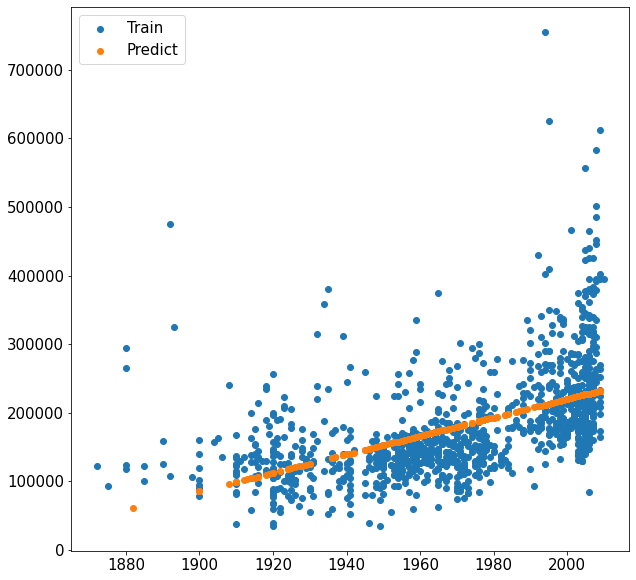

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=1000, lr=0.001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.rcParams["font.size"] = 15
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

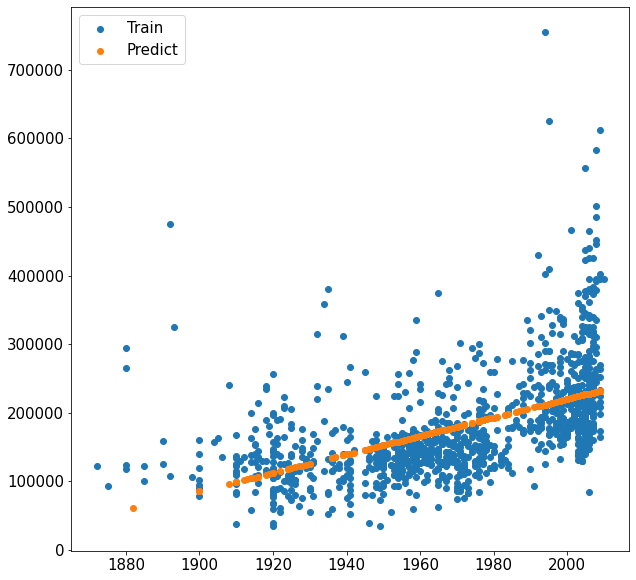

In [25]:
l_regressor_1 = LinearRegression()
l_regressor_1.fit(X_train,y_train)
y_pred_1 = l_regressor_1.predict(X_test)
fig,ax = plt.subplots(figsize=(10,10))

plt.rcParams["font.size"] = 15
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred_1,label="Predict")
plt.legend()
plt.plot();

# Problem 7

## Learning curve plot

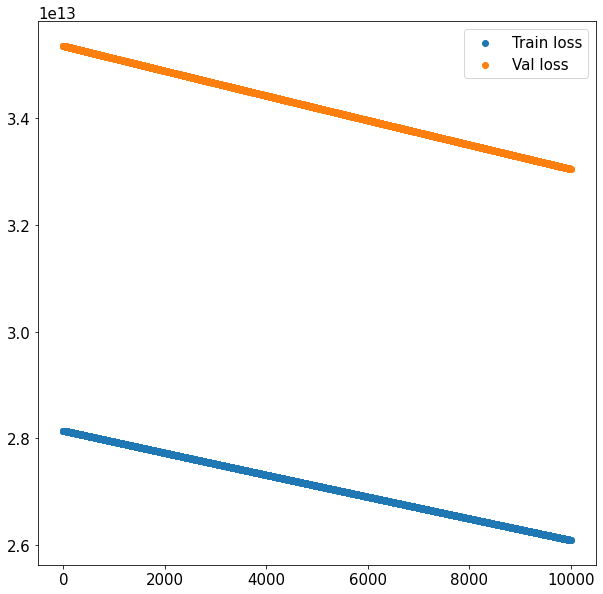

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.rcParams["font.size"] = 15
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();

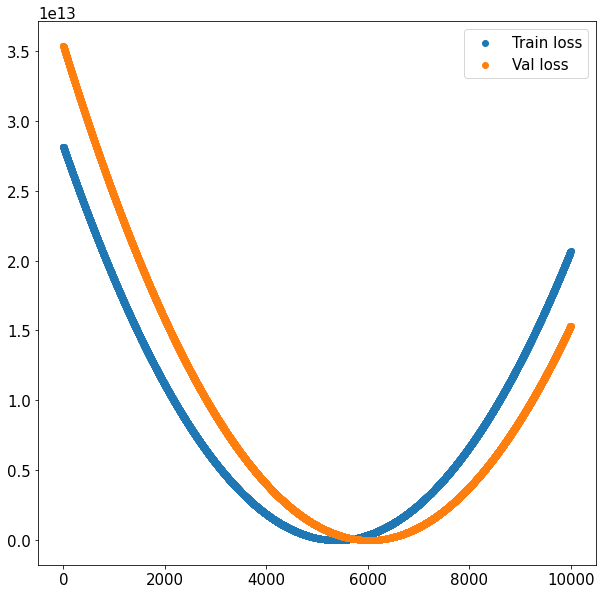

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10000, lr=0.5, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.rcParams["font.size"] = 15
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();

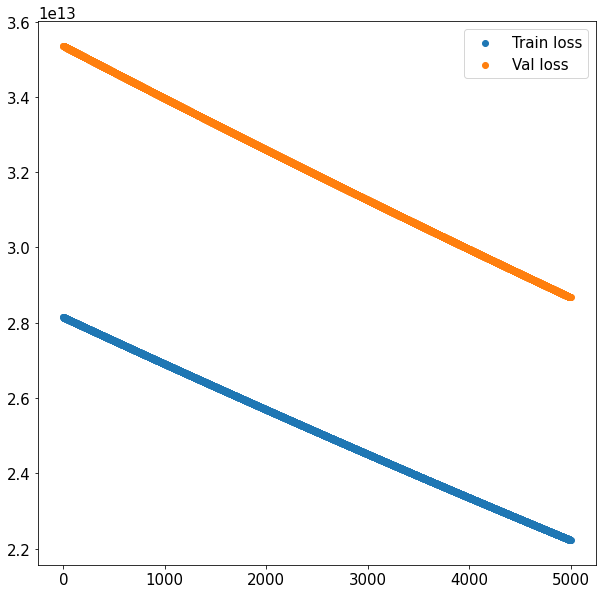

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.06, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.rcParams["font.size"] = 15
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();

# Problem 8 
## (Advance Task) Removal of Bias Term

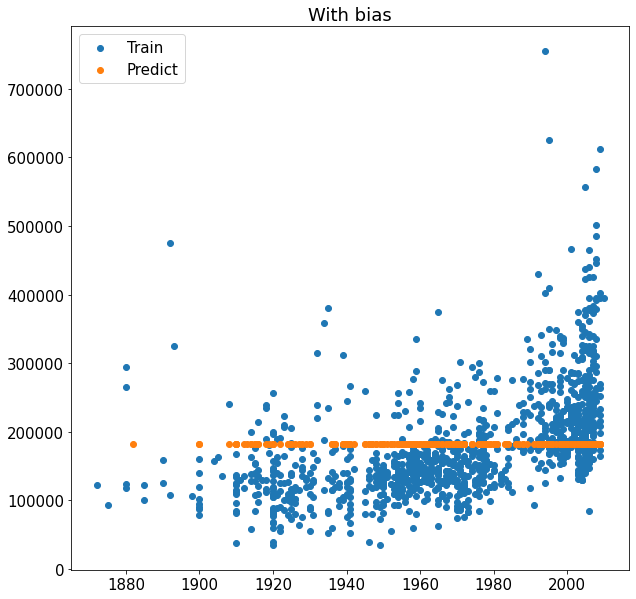

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=False, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.title("With Bias")
plt.rcParams["font.size"] = 15
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

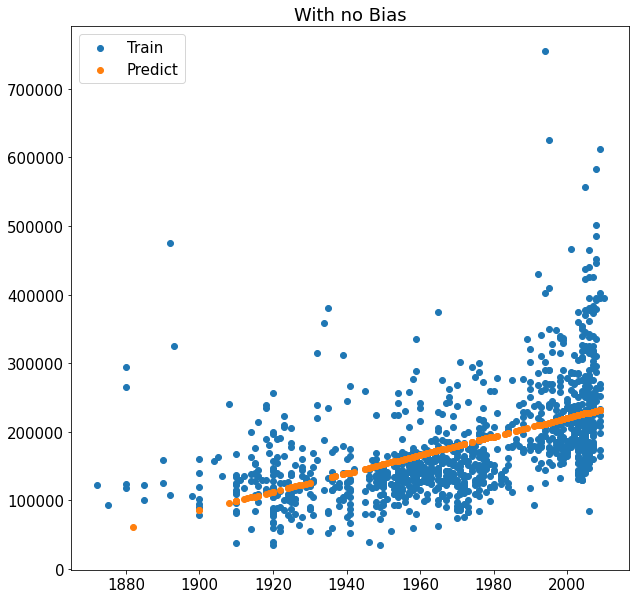

In [43]:
l_regressor = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.title("With no Bias")
plt.rcParams["font.size"] = 15
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();



The Bias affects the predictions

# Problem 9
## (Advance Task) Multidimensional Feature Quantity

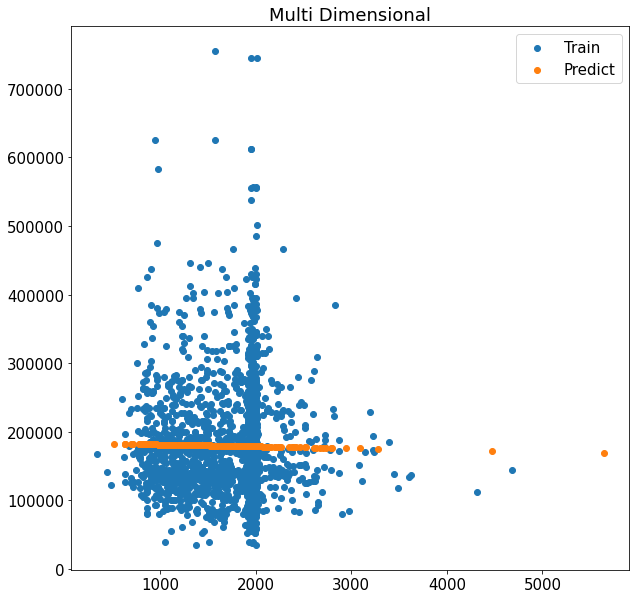

In [44]:
## separating them into variables
X = cleaned_df[['YearBuilt','GrLivArea']].values
y = cleaned_df[['SalePrice']].values
y = np.resize(y,X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(10,10))

plt.title("Multi Dimensional")
plt.rcParams["font.size"] = 15
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

when the square or cube of the feature is used for input The data are scattered in one place

# Problem 10
## (Advance Task) Derivation of Update Formula

The equation is derived by J(θ)=1/2mΣ(θx-y)^2 = 1/2mΣ((xθ)^2 -2yxθ +y^2)

we then devide the derivatives ΔJ(θ)/Δθ

and then = 1/2mΣ(2x^2θ -2yx) = 1/mΣ x(xθ -y)

# Problem 11
## (Advance Task) Problem of Local Optimum Solution

It is possible to find the optimum solution, where gradient descent will be equal to zero but depending on what you are working with you might have many upward and downward and when you reach a low point doesn't necessarly mean you have the optimum solution

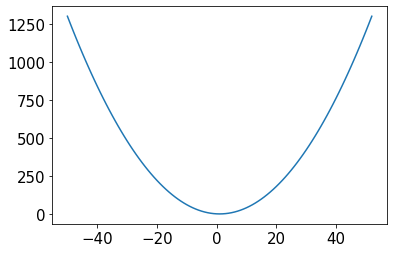

In [45]:
numbers = np.arange(-50,53,1)
equ = 1/2*(numbers-1)**2
plt.plot(numbers,equ);